<a href="https://colab.research.google.com/github/xuxiufeng/Blockchain_Simulation_Multiple_Hackers_with_Resetting_Times/blob/main/Gamma-Gamma-Gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
np.random.seed(2)

In [11]:
k = 4

Generate $\eta_j$ and $\delta_j$, where $j=1,2,3,4$.

In [12]:
eta_list = np.random.uniform(0,1/2,k)
delta_list = np.random.uniform(0,1/3,k)
eta_list, delta_list

(array([0.21799745, 0.01296312, 0.27483124, 0.2176612 ]),
 array([0.1401226 , 0.11011161, 0.06821621, 0.20642366]))

For $X\sim Gamma(\eta_j, \delta_j)$, we have
\begin{eqnarray*}
f(x)=\frac{\delta_j^{\eta_j}}{\Gamma(\eta_j)}x^{\eta_j-1}e^{-\delta_j x}
\end{eqnarray*}

In [13]:
def ET_m(m, eta_list, delta_list, alpha, beta, theta, tau):
    def Generate_Z(m, eta_list, delta_list):
        sum_of_x_list = []
        for i in range(len(eta_list)):
            sum_of_x_list.append(np.sum(np.random.gamma(eta_list[i], 1/delta_list[i], m)))
        Z = min(sum_of_x_list)
        return Z
    def T_m(m, eta_list, delta_list, alpha, beta, theta, tau):
        sum_of_time = 0
        sum_of_w = 0
        y = np.random.gamma(alpha, 1/beta)
        w = np.random.gamma(theta, 1/tau)
        Z_m = Generate_Z(m, eta_list, delta_list)
        while Z_m > y:
            sum_of_time = sum_of_time + y + w
            sum_of_w += w
            Z_m = Generate_Z(m, eta_list, delta_list)
            y = np.random.gamma(alpha, 1/beta)
            w = np.random.gamma(theta, 1/tau)
        return sum_of_time + Z_m, sum_of_w

    ET = np.repeat(np.nan, m)
    sum_w = np.repeat(np.nan, m)
    for i in range(m):
        T_0 = 0
        W_0 = 0
        iter = 30000 # iter 30000
        for j in range(iter):
            T_0 += T_m(i+1, eta_list, delta_list, alpha, beta, theta, tau)[0]
            W_0 += T_m(i+1, eta_list, delta_list, alpha, beta, theta, tau)[1]
        ET[i] = T_0/iter
        sum_w[i] = W_0/iter
        print(ET[i])
    return ET, sum_w

0.0321806447514481
0.11400451633540357
0.21121793318098958
0.300324255027416
0.4167604405260408
0.5552166758732623
0.6504726585787589
0.7755496519962367
0.8867743399971562
1.0109207808927623
1.1676247681906669
1.2867364045993446
1.4155901864032048
1.5633682961150661
1.6773874775184852
1.8551612915601536
2.003195464252633
2.1765988329079886
2.301931207101946
2.4955128832448867
2.6846178765319353
2.815955491101734
3.0041822430968015
3.2449569190929637
3.416009032284593
3.605304678016735
3.841493257038191
4.020434694009632
4.292256104619208
4.555232215281968
4.794876431008143
5.0135713576730385
5.301593044029854
5.4672232219783465
5.692373221891715
5.925376093600932
6.272817301146974
6.545531186070351
6.77503791945929
7.182403399895705


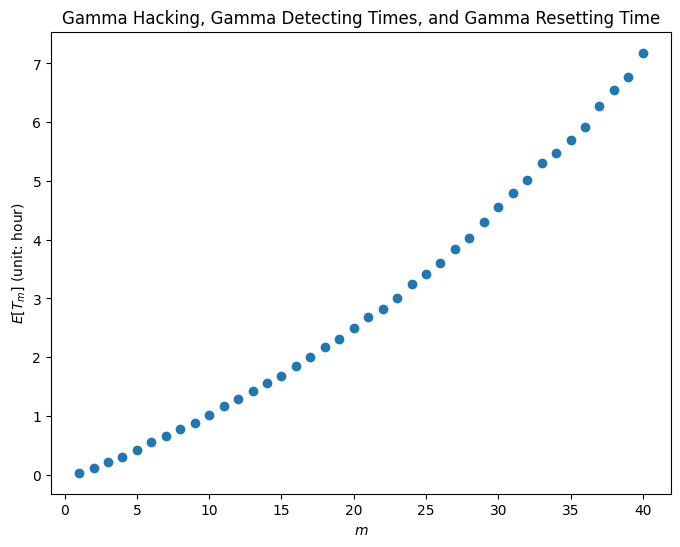

In [14]:
m = 40
alpha = 1/3
beta = 1/2
theta = 1/4
tau = 1/5
ET_m, sum_w = ET_m(m, eta_list, delta_list, alpha, beta, theta, tau)
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), ET_m)
plt.xlabel(r'$m$')
plt.ylabel(r'$E[T_m]$ (unit: hour)')
plt.title('Gamma Hacking, Gamma Detecting Times, and Gamma Resetting Time')
plt.show()

In [15]:
R = [.6*c for c in range(1, m+1)]
C_2 = [.5*c for c in range(1, m+1)]
C_1 = [.2*c**.5  for c in range(1, m+1)]
E_mNR = np.repeat(np.nan, len(ET_m))
for j in range(m):
  E_mNR[j] = ((ET_m[j]-sum_w[j])*(R[j] - C_2[j]) - C_1[j]*sum_w[j])/ET_m[j]
m_max = np.where(E_mNR == max(E_mNR))[0][0] + 1
print(m_max, max(E_mNR))
E_mNR

40 0.37892340365637683


array([-0.11216628, -0.17400373, -0.20475459, -0.28215441, -0.25898101,
       -0.22156582, -0.25785811, -0.24905401, -0.24640988, -0.25825535,
       -0.19781455, -0.19780076, -0.20850985, -0.15029007, -0.19805828,
       -0.18335351, -0.12231603, -0.13024426, -0.14141811, -0.10881876,
       -0.05220474, -0.06136021, -0.05423498,  0.00964761,  0.01490937,
       -0.02784378,  0.06241041,  0.06239307,  0.08016979,  0.22448386,
        0.14590603,  0.19188262,  0.27704909,  0.22033323,  0.23849507,
        0.19131305,  0.26518303,  0.30814132,  0.2906724 ,  0.3789234 ])

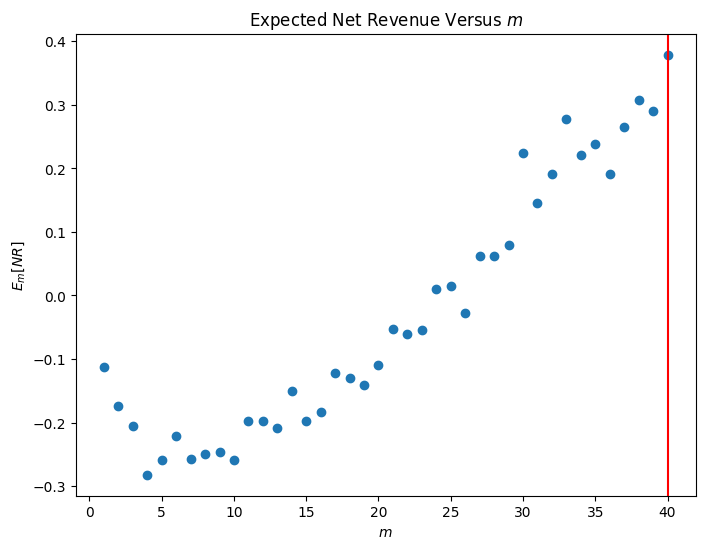

In [16]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), E_mNR)
plt.axvline(x = m_max, c='red')
plt.xlabel(r'$m$')
plt.ylabel(r'$E_m[NR]$')
plt.title(r'Expected Net Revenue Versus $m$')
plt.show()